# 1) Delivery_time -> Predict delivery time using sorting time 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
Delivery_data=pd.read_csv('C:\\Users\\vikra\\OneDrive\\Desktop\\Data scince assignment\\Assignment\\Simple linear assignment\\delivery_time.csv')
Delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
Delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
Delivery_data=Delivery_data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [5]:
Delivery_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
len(Delivery_data[Delivery_data.duplicated()])

0

In [7]:
Delivery_data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [8]:
Delivery_data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
Delivery_data.shape

(21, 2)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

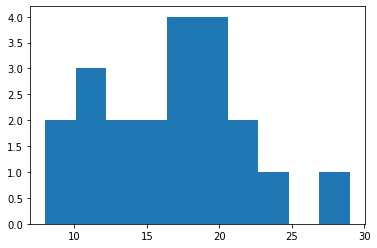

In [10]:
plt.hist(Delivery_data.delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a703670af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a703681190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a703670820>],
 'medians': [<matplotlib.lines.Line2D at 0x1a703681670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a703681940>],
 'means': []}

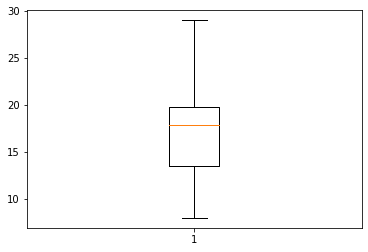

In [11]:
plt.boxplot(Delivery_data.delivery_time)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

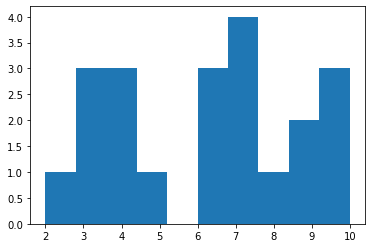

In [12]:
plt.hist(Delivery_data.sorting_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a703762e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1a703774460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a703762bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a703774a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a703774cd0>],
 'means': []}

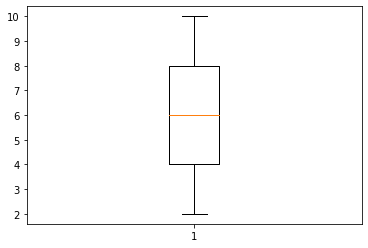

In [13]:
plt.boxplot(Delivery_data.sorting_time)

Text(0, 0.5, 'delivery_time')

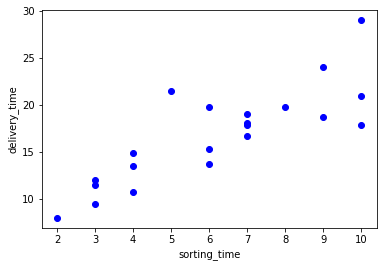

In [14]:
plt.plot(Delivery_data.sorting_time,Delivery_data.delivery_time,"bo");
plt.xlabel("sorting_time");
plt.ylabel("delivery_time")

In [15]:
Delivery_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [16]:
np.corrcoef(Delivery_data.sorting_time,Delivery_data.delivery_time)

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

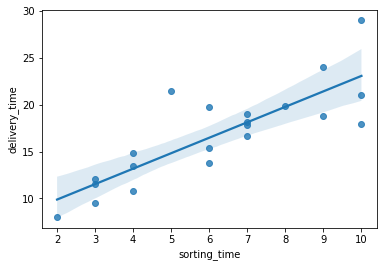

In [17]:
sn.regplot(x="sorting_time",y='delivery_time',data=Delivery_data)

### Preparing linear regression model

In [18]:
import statsmodels.formula.api as smf
D_model=smf.ols("delivery_time~sorting_time",data=Delivery_data).fit()

In [19]:
D_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
D_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        08:30:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
pred =D_model.predict(Delivery_data.sorting_time)

In [22]:
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [23]:
pred.corr(Delivery_data.delivery_time)

0.8259972607955327

Text(0, 0.5, 'delivery_time')

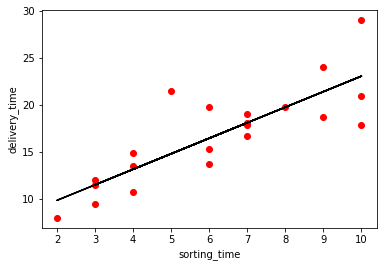

In [24]:
plt.scatter(x=Delivery_data['sorting_time'],y=Delivery_data['delivery_time'],color='red');
plt.plot(Delivery_data['sorting_time'],pred,color='black');
plt.xlabel('sorting_time');
plt.ylabel('delivery_time')

In [25]:
# Transforming variables for accuracy

In [26]:
D_model2=smf.ols("delivery_time~np.log(sorting_time)",data=Delivery_data).fit()

In [27]:
D_model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [28]:
D_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.64e-06
Time:                        08:30:03   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
pred_2 =D_model2.predict(Delivery_data.sorting_time)
pred_2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

Text(0, 0.5, 'delivery_time')

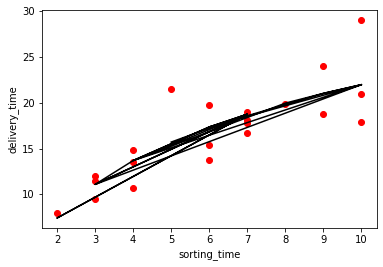

In [30]:
plt.scatter(x=Delivery_data['sorting_time'],y=Delivery_data['delivery_time'],color='red');
plt.plot(Delivery_data['sorting_time'],pred_2,color='black');
plt.xlabel('sorting_time');
plt.ylabel('delivery_time')

In [31]:
pred_2.corr(Delivery_data.delivery_time)

0.8339325279256244

In [32]:
#Exponential transformation 
D_model3=smf.ols('np.log(delivery_time)~sorting_time',data=Delivery_data).fit()

In [33]:
D_model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [34]:
D_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 09 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                           08:30:04   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred_log = D_model3.predict(Delivery_data.sorting_time)
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [36]:
pred_3=np.exp(pred_log)
pred_3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [37]:
pred_3.corr(Delivery_data.delivery_time)

0.8085780108289259

In [38]:
#D_model2 having highest R-squared value so we use D_model2 model

In [39]:
Delivery_data_resid=D_model2.resid_pearson
Delivery_data_resid

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [40]:
Delivery_data["predicted"]=D_model2.fittedvalues
Delivery_data["errors"]=D_model2.resid
Delivery_data['Error_sq']=D_model2.resid**2
Delivery_data.head()

,delivery_time,sorting_time,predicted,errors,Error_sq
0,21.00,10,21.982913,-0.982913,0.966117
1,13.50,4,13.696517,-0.196517,0.038619
2,19.75,6,17.363305,2.386695,5.696312
3,24.00,9,21.030094,2.969906,8.820343
4,29.00,10,21.982913,7.017087,49.239517


Text(0, 0.5, 'Standardized Residual')

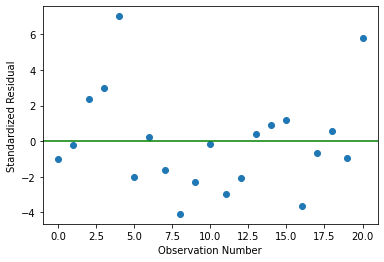

In [41]:
plt.plot(D_model2.resid,'o');
plt.axhline(y=0,color='green');
plt.xlabel("Observation Number");
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

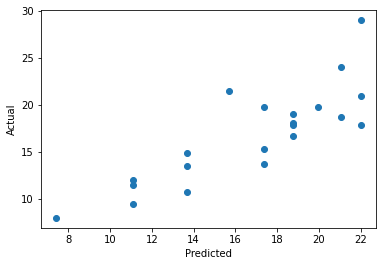

In [42]:
plt.scatter(x=pred_2,y=Delivery_data.delivery_time);plt.xlabel("Predicted");plt.ylabel("Actual")

In [43]:
#Quadratic model
Delivery_data["sorting_time_sq"]=Delivery_data.sorting_time*Delivery_data.sorting_time

In [44]:
D_model_quad =smf.ols("delivery_time~sorting_time+sorting_time_sq",data=Delivery_data).fit()

In [45]:
D_model_quad.params

Intercept          3.522234
sorting_time       2.813002
sorting_time_sq   -0.093198
dtype: float64

In [46]:
D_model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.39e-05
Time:                        08:30:07   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5222      4.160      0.847      0.408      -5.217      12.261
sorting_time        2.8130      1.461      1.926      0.070      -0.256       5.882
sorting_time_sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
Delivery_data.head()

,delivery_time,sorting_time,predicted,errors,Error_sq,sorting_time_sq
0,21.00,10,21.982913,-0.982913,0.966117,100
1,13.50,4,13.696517,-0.196517,0.038619,16
2,19.75,6,17.363305,2.386695,5.696312,36
3,24.00,9,21.030094,2.969906,8.820343,81
4,29.00,10,21.982913,7.017087,49.239517,100


In [49]:
pred_quad = D_model_quad.predict(Delivery_data)

(array([1., 3., 4., 4., 4., 1., 2., 0., 0., 2.]),
 array([-4.43242955, -3.32242955, -2.21242955, -1.10242955,  0.00757045,
         1.11757045,  2.22757045,  3.33757045,  4.44757045,  5.55757045,
         6.66757045]),
 <BarContainer object of 10 artists>)

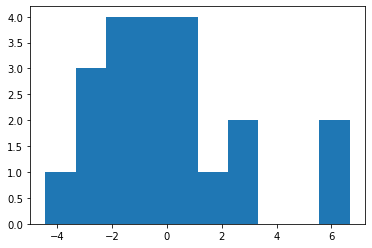

In [50]:
plt.hist(D_model_quad.resid)

# ==========================================================